## Hamrobazzar Utility Price Prediction ( HamroPrice)


### Problem Statement

In the project, we are exploring different attributes of Auto (Bike) in hamrobazzar; their relations to price value and finally derive a price-prediction model. 

Since we will know the price values for our training process, it is a problem of supervised learning.


#### Target variable: Cost 

#### Features :
      1. Condition : Current bike condition (excellent, good, Like New)
      2. Anchal : 
      2. Lot No : Bike lot no. 
      3. Make Year : Bike purchased year
      4. Kilometers : Total kilometers covered by the bike

In [663]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import norm

%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]

In [664]:
df = pd.read_csv('hbcsv.csv')

In [665]:
df.head()

,Brand,Name,Anchal,Type,Condition,Used For (year or month),Lot No,Price,Mileage (km / l),Engine (CC),Make Year,Kilometers
0,UnKnown,UnKnown,Bagmati,Standard,Excellent,3 years,65,135,NaN,150,2015,NaN
1,yamaha,UnKnown,Bagmati,Sports,Good/Fair,5 months,32,85000,NaN,153,2010,27000
2,UnKnown,UnKnown,Bagmati,Sports,Excellent,3 years,67,155,NaN,153,2015,23000
3,UnKnown,UnKnown,Bagmati,Sports,Excellent,NaN,67,115000,NaN,125,2015,NaN
4,yamaha,UnKnown,Bagmati,Standard,Excellent,NaN,32,68000,NaN,150,2009,NaN


In [666]:
df.shape

(3471, 12)

In [667]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3471 entries, 0 to 3470
Data columns (total 12 columns):
Brand                       3471 non-null object
Name                        3471 non-null object
Anchal                      3471 non-null object
Type                        3471 non-null object
Condition                   3281 non-null object
Used For (year or month)    2139 non-null object
Lot No                      3470 non-null object
Price                       3471 non-null int64
Mileage  (km / l)           0 non-null float64
Engine (CC)                 3086 non-null object
Make Year                   2502 non-null object
Kilometers                  2669 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 325.5+ KB


In [668]:
# rename cols
columns = ['brand', 'bike_name', 'area', 'type', 'condition', 'months_used', 'lot_number',
 'cost', 'mileage', 'engine_cc', 'make_year', 'kilometers']
df.columns = columns



In [669]:
df.head()

,brand,bike_name,area,type,condition,months_used,lot_number,cost,mileage,engine_cc,make_year,kilometers
0,UnKnown,UnKnown,Bagmati,Standard,Excellent,3 years,65,135,NaN,150,2015,NaN
1,yamaha,UnKnown,Bagmati,Sports,Good/Fair,5 months,32,85000,NaN,153,2010,27000
2,UnKnown,UnKnown,Bagmati,Sports,Excellent,3 years,67,155,NaN,153,2015,23000
3,UnKnown,UnKnown,Bagmati,Sports,Excellent,NaN,67,115000,NaN,125,2015,NaN
4,yamaha,UnKnown,Bagmati,Standard,Excellent,NaN,32,68000,NaN,150,2009,NaN


In [670]:
selected_columns = ['brand', 'condition', 'months_used',
                   'engine_cc', 'make_year', 'kilometers', 'cost']

df = df[selected_columns]
df.head()

,brand,condition,months_used,engine_cc,make_year,kilometers,cost
0,UnKnown,Excellent,3 years,150,2015,NaN,135
1,yamaha,Good/Fair,5 months,153,2010,27000,85000
2,UnKnown,Excellent,3 years,153,2015,23000,155
3,UnKnown,Excellent,NaN,125,2015,NaN,115000
4,yamaha,Excellent,NaN,150,2009,NaN,68000


In [671]:
# convert months used from years to total months (default value to 12 months)
import math
import re

word_to_num = {'one':1,
          'two':2,
          'three':3,
          'four': 4,
          'five': 5}

def get_int_value_from_string(x):
    """
    for ex: 1year..
    """
    try:
        int_val = int(re.search(r'\d+', x).group())
        str_val = x[1:]
        if str_val.lower().startswith('y'):
            return int_val * 12
        else:
            return int_val
    except:
        return 12
    
def get_total_months(x):
    if x:
        try:
            math.isnan(x)
            return 12
        except:
            pass
            
        x = str(x.strip().lower())
        
        if x.startswith('few') or x.startswith('some'):
            return 36
        if x.startswith('a year') and x.endswith('more'):
            return 24
        
        if '+' in x:
            int_val = int(re.search(r'\d+', x).group())
            return (int_val + 1) * 12
        check_list = x.split(' ')
        
        if '/' in check_list[0] or '-' in check_list[0]:
            sep = '/' if '/' in check_list[0] else '-'
            if len(check_list) == 1:
                slash_values = list(map(int, re.findall(r'\d+', check_list[0])))
                print('slahs valeus', slash_values)
                try:
                    return int(slash_values[1]) * 12
                except:
                    return int(slash_values[0]) * 12
                    
            slash_values = check_list[0].split(sep)
            if check_list[1].lower().startswith('y'):
                if slash_values[1].isdigit():
                    return int(slash_values[1])* 12
                else:
                    return slash_values[0]* 12
            else:
                if slash_values[1].isdigit():
                    return int(slash_values[1])
                else:
                    return slash_values[0]
                
            
        if check_list[0].lower() in word_to_num:
            return word_to_num[check_list[0].lower()]
        
        if len(check_list) == 1:
            return get_int_value_from_string(x)
        
        elif check_list[1].lower() == 'above':
            return get_int_value_from_string(check_list[0].lower())
            
        else:    
            if check_list[1].lower().startswith('y'):
                no_of_years = check_list[0]
                if no_of_years.isdigit():
                    no_of_years = int(no_of_years)
                    return no_of_years * 12
                else:
                    orig = float(no_of_years)
                    whole = math.floor(orig)    # whole = 5.0
                    frac = orig - whole  
                    frac_months = int(frac * 12)
                    return int(whole) * 12 + frac_months

            else:
                if check_list[1].lower().startswith('m'):
                    if check_list[0].isdigit():
                        return int(check_list[0])
                    else:
                        int_vals = list(map(int, re.findall(r'\d+', check_list[0])))
                        if len(int_vals) > 1:
                            total_months = int_vals[0] * 12 + int_vals[1]
                            return total_months
                else:
                    return 12
#                 else:
#                     return int(check_list[0])
    else:
        return 12
            
    

In [672]:
df['months_used'] = df['months_used'].apply(lambda x: get_total_months(x))

slahs valeus [3, 4]
slahs valeus [3, 4]
slahs valeus [2074, 10, 1, 2075]
slahs valeus [2069, 5, 3]
slahs valeus [2]
slahs valeus [4, 5]
slahs valeus [4, 5]


In [673]:
df.tail()

,brand,condition,months_used,engine_cc,make_year,kilometers,cost
3466,vespa,Like New (used few times),12,150,NaN,NaN,110000
3467,UnKnown,Excellent,36,230,2014,36000,130000
3468,UnKnown,Excellent,12,1200,2012,6000,2800000
3469,honda,Good/Fair,12,100,NaN,NaN,50000
3470,mahindra,Good/Fair,36,125,2012,7000,65000


### Handling Missing Values

In [674]:
# drop rows if all the column values are null
df.dropna(how='all').shape

(3471, 7)

### Fill Missing Values for brand

In [676]:
# let us see which of the brand is occurring frequently
df['brand'].value_counts()

UnKnown          1730
bajaj             569
honda             424
yamaha            207
suzuki            102
tvs               100
royal enfield      89
hero               73
crossfire          51
benelli            39
mahindra           37
um                 19
vespa              19
hartford            8
reiju               2
apollo              1
aprilla             1
Name: brand, dtype: int64

In [677]:
df.brand.isnull().sum()

0

In [678]:
# first fill 'UnKnown' brand with nan
df['brand'] = df['brand'].replace('UnKnown', np.nan)
# df['brand'] = df['brand'].replace('NaN', np.nan)

In [679]:
df['brand'].value_counts()

bajaj            569
honda            424
yamaha           207
suzuki           102
tvs              100
royal enfield     89
hero              73
crossfire         51
benelli           39
mahindra          37
um                19
vespa             19
hartford           8
reiju              2
apollo             1
aprilla            1
Name: brand, dtype: int64

In [680]:
df.brand.isnull().sum()

1730

In [681]:
# we can see bajaj is the most ocurring brand
# let us fill up the null brand with random choices from a list
random_choices = ['bajaj', 'honda', 'yamaha', 'suzuki', 'tvs',
                  'royal enfield', 'hero']
# df['brand'].fillna(value='bajaj', inplace=True)
#get mask of NaNs in brand
brand_null_mask = df['brand'].isnull()
#count rows with NaNs in brand
total_null_count = brand_null_mask.sum()
total_null_count

1730

In [682]:
df['brand'].fillna(
    pd.Series(np.random.choice(random_choices, size=total_null_count)),
    inplace=True)

In [683]:
df.brand.isnull().sum()

798

In [659]:
df['brand'].value_counts()

bajaj            709
honda            559
yamaha           331
suzuki           248
tvs              234
royal enfield    209
hero             206
crossfire         51
benelli           39
mahindra          37
um                19
vespa             19
hartford           8
reiju              2
apollo             1
aprilla            1
Name: brand, dtype: int64

In [660]:
df.brand.isnull().sum()

798

In [641]:
df[df.brand.isnull()]

,brand,condition,months_used,engine_cc,make_year,kilometers,cost
1735,NaN,Good/Fair,108,200,2009,NaN,75000
1736,NaN,Good/Fair,12,150,NaN,36960,100000
1737,NaN,Like New (used few times),36,NaN,NaN,NaN,6000
1738,NaN,Like New (used few times),5,150,2016,7654,26000
1739,NaN,Excellent,12,NaN,NaN,21800,35000
1742,NaN,Excellent,12,400,NaN,11000,399000
1747,NaN,Excellent,12,350,2005,NaN,280000
1749,NaN,Excellent,12,NaN,NaN,NaN,125000
1750,NaN,Excellent,120,350,2007,34000,300000
1753,NaN,Excellent,60,150,2012,40000,135000


0           bajaj
1          yamaha
2            hero
3            hero
4          yamaha
5           bajaj
6            hero
7           bajaj
8             tvs
9           honda
10          bajaj
11          bajaj
12         suzuki
13         yamaha
14            tvs
15         yamaha
16            tvs
17          honda
18          bajaj
19          honda
20          bajaj
21          honda
22          honda
23          honda
24         suzuki
25          bajaj
26            tvs
27         yamaha
28          honda
29          honda
          ...    
3441       yamaha
3442       yamaha
3443       yamaha
3444        bajaj
3445        honda
3446        honda
3447        honda
3448        bajaj
3449       yamaha
3450       yamaha
3451       yamaha
3452          tvs
3453         hero
3454         hero
3455        honda
3456        honda
3457        honda
3458    crossfire
3459    crossfire
3460    crossfire
3461        honda
3462        honda
3463        honda
3464       yamaha
3465      

### Fill Missing Values for condition

In [586]:
# values count in condition
df['condition'].value_counts()

Excellent                    1955
Like New (used few times)     959
Good/Fair                     366
Not Working                     1
Name: condition, dtype: int64

In [587]:
df.head()

,brand,condition,months_used,engine_cc,make_year,kilometers,cost
0,hero,Excellent,36,150,2015,NaN,135
1,yamaha,Good/Fair,5,153,2010,27000,85000
2,honda,Excellent,36,153,2015,23000,155
3,royal enfield,Excellent,12,125,2015,NaN,115000
4,yamaha,Excellent,12,150,2009,NaN,68000


In [588]:
# df['condition'] = df['condition'].replace('NaN', np.nan)
df['condition'].fillna(value=np.nan, inplace=True)

In [589]:
# total 190 null entries in condition column
total_null_count_2 = df.condition.isnull().sum()
total_null_count_2

190

In [565]:
condition_random_choices = ['Excellent','Like New (used few times)', 'Good/Fair']

In [590]:
df['condition'] = df['condition'].fillna(
    pd.Series(np.random.choice(condition_random_choices, size=total_null_count_2)))

In [594]:
df[df.condition.isnull()]

,brand,condition,months_used,engine_cc,make_year,kilometers,cost
208,suzuki,NaN,12,150,NaN,NaN,69999
248,bajaj,NaN,12,NaN,NaN,NaN,50000
256,honda,NaN,12,150,NaN,NaN,45000
257,honda,NaN,48,250,2013,29000,300000
260,bajaj,NaN,48,150,NaN,NaN,90000
283,bajaj,NaN,120,150,2008,41600,60000
297,royal enfield,NaN,10,350,2017,11000,400000
299,bajaj,NaN,12,125,NaN,14000,120000
343,bajaj,NaN,12,220,NaN,NaN,142000
344,honda,NaN,12,125,NaN,NaN,75000


In [ ]:

# drop null rows
df.dropna(
    subset=['make_year'],
    how='all', inplace = True)

In [172]:
df[df['make_year'].isnull()]

,cost,condition,area,lot_number,make_year,kilometers


In [173]:
# only select rows havig make_year length == 4
df = df[df['make_year'].map(len) == 4]

In [174]:
df.head(3)

,cost,condition,area,lot_number,make_year,kilometers
0,65000,Good,Bagmati,50,2012,20000
1,235000,Like New,Bagmati,88,2017,6000+
2,140000,Excellent,Bagmati,65,2014,31000


In [175]:
df.dropna(
    subset=['kilometers'],
    how='all', inplace = True)

In [176]:
df[df['kilometers'].isnull()]

,cost,condition,area,lot_number,make_year,kilometers


In [177]:
df.head(10)

,cost,condition,area,lot_number,make_year,kilometers
0,65000,Good,Bagmati,50,2012,20000
1,235000,Like New,Bagmati,88,2017,6000+
2,140000,Excellent,Bagmati,65,2014,31000
3,117000,Excellent,Bagmati,69,2015,15000
4,180000,Good,Janakpur,11,2017,9000
9,80000,NaN,Bagmati,52,2014,17000
10,450000,Excellent,Bagmati,78,2016,6700
11,84000,Excellent,Bagmati,40,2010,38900
13,60000,NaN,Bagmati,23,2008,41600
14,168000,Like New,Bagmati,91,2018,5900


In [178]:
# let us remove rows having kilometers < 1000, (removing outliers)
df = df[df['kilometers'].map(len) > 4]

In [179]:
df.tail()

,cost,condition,area,lot_number,make_year,kilometers
1411,200000,Excellent,Bagmati,70,2073,24000
1413,70000,Excellent,Bagmati,29,2008,48721
1415,80000,Excellent,Bagmati,31,2009,42016
1416,220000,Excellent,Bagmati,83,2017,20000
1417,325000,Excellent,Bagmati,41,2010,250000


In [180]:
df['kilometers'] = df['kilometers'].str.replace('+', '')
df['kilometers'] = df['kilometers'].str.replace(',', '')

In [181]:
df.head()

,cost,condition,area,lot_number,make_year,kilometers
0,65000,Good,Bagmati,50,2012,20000
1,235000,Like New,Bagmati,88,2017,6000
2,140000,Excellent,Bagmati,65,2014,31000
3,117000,Excellent,Bagmati,69,2015,15000
9,80000,NaN,Bagmati,52,2014,17000


In [182]:
df.shape

(558, 6)

In [183]:
df['condition'] = df['condition'].astype('str')
df['area'] = df['area'].astype('str')
df['lot_number'] = df['lot_number'].astype('str')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 1417
Data columns (total 6 columns):
cost          558 non-null int64
condition     558 non-null object
area          558 non-null object
lot_number    558 non-null object
make_year     558 non-null object
kilometers    558 non-null object
dtypes: int64(1), object(5)
memory usage: 30.5+ KB


In [185]:
df[df['make_year'].astype(str).str.isdigit()]
df[df['kilometers'].astype(str).str.isdigit()]
df.shape

(558, 6)

In [186]:
def check_numeric(value):
    try:
        return int(value)
    except:
        return np.nan

df['make_year'] = df['make_year'].apply(lambda x: check_numeric(x))
df['kilometers'] = df['kilometers'].apply(lambda x: check_numeric(x))

In [187]:
df.dropna(
    subset=['kilometers'],
    how='all', inplace = True)
df.dropna(
    subset=['make_year'],
    how='all', inplace = True)

In [188]:
df.shape

(549, 6)

In [189]:
df['make_year'] = df['make_year'].astype(int)
df['kilometers'] = df['kilometers'].astype(int)

In [190]:
df.head()

,cost,condition,area,lot_number,make_year,kilometers
0,65000,Good,Bagmati,50,2012,20000
1,235000,Like New,Bagmati,88,2017,6000
2,140000,Excellent,Bagmati,65,2014,31000
3,117000,Excellent,Bagmati,69,2015,15000
9,80000,nan,Bagmati,52,2014,17000


In [191]:
# add new feature travel_years(number of years)
import datetime

this_year = datetime.datetime.today().year

df['travel_years'] = df['make_year'].apply(lambda x: this_year - x)

In [192]:
df.head(10)

,cost,condition,area,lot_number,make_year,kilometers,travel_years
0,65000,Good,Bagmati,50,2012,20000,6
1,235000,Like New,Bagmati,88,2017,6000,1
2,140000,Excellent,Bagmati,65,2014,31000,4
3,117000,Excellent,Bagmati,69,2015,15000,3
9,80000,nan,Bagmati,52,2014,17000,4
11,84000,Excellent,Bagmati,40,2010,38900,8
13,60000,nan,Bagmati,23,2008,41600,10
17,98000,Excellent,Bagmati,71,2015,16500,3
18,478000,Excellent,Bagmati,72,2015,12400,3
24,210000,Like New,Bagmati,83,2017,11000,1


In [193]:
df[df['condition'] == 'nan']


,cost,condition,area,lot_number,make_year,kilometers,travel_years
9,80000,nan,Bagmati,52,2014,17000,4
13,60000,nan,Bagmati,23,2008,41600,10
34,400000,nan,Lumbini,35,2017,11000,1
144,120000,nan,Bagmati,66,2014,25000,4
146,125000,nan,Bagmati,64,2014,29000,4
251,70000,nan,Bagmati,40,2010,29000,8
353,199999,nan,Bagmati,79,2016,15000,2
455,125000,nan,Bagmati,65,2015,25000,3
722,190000,nan,Bagmati,82,2016,10000,2
755,68000,nan,Bagmati,43,2012,27000,6


In [194]:
# logic to fill condition value
# if travel_years is =< 1 years condition : Like New
# elif travel_years >1 and <=3 : Excellent
# else Good
def fill_null_auto_condition(condition, travel_years):
    if condition == 'nan':
        if travel_years <= 1:
            return 'Like New'
        elif travel_years > 1 and travel_years <= 3:
            return 'Excellent'
        else:
            return 'Good'
    return condition

In [195]:
df['condition'] = df.apply(
    lambda row: fill_null_auto_condition(row['condition'], row['travel_years']),
    axis=1)

In [196]:
df.head(10)

,cost,condition,area,lot_number,make_year,kilometers,travel_years
0,65000,Good,Bagmati,50,2012,20000,6
1,235000,Like New,Bagmati,88,2017,6000,1
2,140000,Excellent,Bagmati,65,2014,31000,4
3,117000,Excellent,Bagmati,69,2015,15000,3
9,80000,Good,Bagmati,52,2014,17000,4
11,84000,Excellent,Bagmati,40,2010,38900,8
13,60000,Good,Bagmati,23,2008,41600,10
17,98000,Excellent,Bagmati,71,2015,16500,3
18,478000,Excellent,Bagmati,72,2015,12400,3
24,210000,Like New,Bagmati,83,2017,11000,1


In [197]:
# condition is a categorical variable
df['condition'] = df['condition'].astype('category')

In [198]:
df['condition'].cat.categories

Index(['Excellent', 'Good', 'Like New'], dtype='object')

In [199]:
df['cost'].describe()

count    5.490000e+02
mean     1.692965e+05
std      1.153137e+05
min      1.800000e+01
25%      8.900000e+04
50%      1.450000e+05
75%      2.150000e+05
max      1.025000e+06
Name: cost, dtype: float64

/home/leapfrong/workspace/envs/envpractice/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


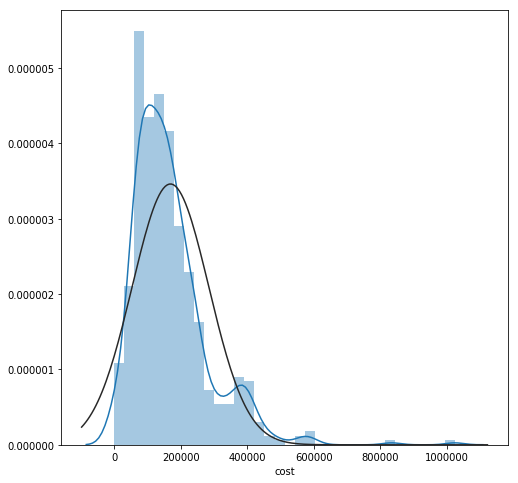

In [200]:


sns.distplot(df['cost'], fit=norm)

In [201]:
print("Skewness: %f" % df['cost'].skew())
print("Kurtosis: %f" % df['cost'].kurt())

Skewness: 1.997070
Kurtosis: 7.912471


In [202]:
df['cost'] = np.log(df['cost'])

In [203]:
df['cost']

0       11.082143
1       12.367341
2       11.849398
3       11.669929
9       11.289782
11      11.338572
13      11.002100
17      11.492723
18      13.077366
24      12.254863
25      11.225243
26      12.013701
34      12.899220
38      12.154779
39      12.278393
40      10.915088
41      11.074421
42      10.993732
48      12.948010
49      12.230765
53      12.206073
55      12.292246
56      11.512925
57      11.251561
58      11.911702
59      10.933107
60      11.884489
64      11.350407
66      11.561716
70      11.652687
          ...    
1361    11.552146
1363    12.577636
1365    12.013701
1368    11.561716
1370    12.072541
1371    11.918391
1374    12.429216
1376    11.884489
1377    12.367341
1379    11.373663
1380    11.951180
1381    12.206073
1382    11.350407
1385    11.082143
1388    11.695247
1390    12.468437
1392    11.225243
1393    11.884489
1399    11.728037
1402    11.982929
1403    11.736069
1406    12.180755
1407    12.254863
1409    11.396392
1410    11

In [204]:
print("Skewness: %f" % df['cost'].skew())
print("Kurtosis: %f" % df['cost'].kurt())

Skewness: -4.084435
Kurtosis: 22.257248


/home/leapfrong/workspace/envs/envpractice/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


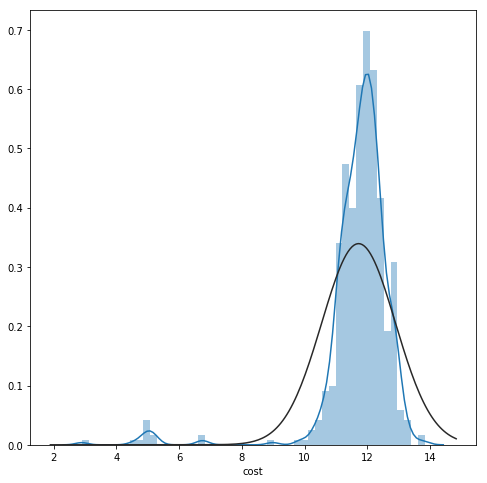

In [205]:
sns.distplot(df['cost'], fit=norm)

In [206]:
print("Skewness: %f" % df['cost'].skew())
print("Kurtosis: %f" % df['cost'].kurt())

Skewness: -4.084435
Kurtosis: 22.257248


In [163]:
df['make_year'].head()

0    2012
1    2017
2    2014
3    2015
9    2014
Name: make_year, dtype: int64

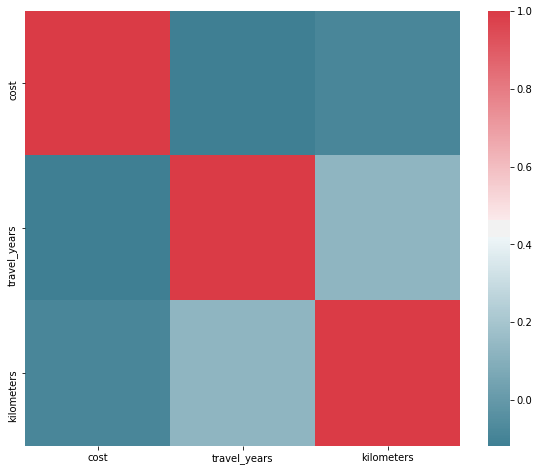

In [212]:
f, ax = plt.subplots(figsize=(10, 8))

df1 = df[['cost', 'travel_years', 'kilometers']]
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)